In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import kde
import seaborn as sns

In [7]:
# Initialize the array's 
x_arr = np.array([])
y_arr = np.array([])

with open("/home/kristor/Work/Vacuum-MD/data/Test-99/out/density_emit.bin", 'rb') as f:
    while True:
        # Read the data
        try:
            x, y = np.fromfile(file=f, count=2, dtype=np.float64)
            emit = np.fromfile(file=f, count=1, dtype=np.int32)
        except:
            break # Break when there is an error, i.e. when we reach the end of the file hopefully.
            
        # Append the data to the array's and scale it to nm
        x_arr = np.append(x_arr, x/1.0E-9)
        y_arr = np.append(y_arr, y/1.0E-9)

In [8]:
data = np.vstack((x_arr, y_arr)).T
data.shape

(74220, 2)

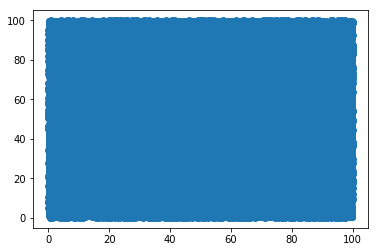

In [9]:
plt.scatter(x_arr, y_arr)

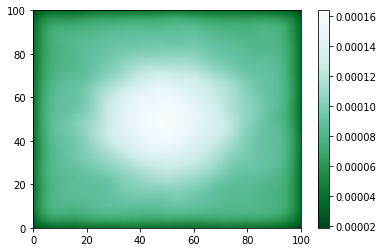

In [10]:
# https://python-graph-gallery.com/86-avoid-overlapping-in-scatterplot-with-2d-density/

nbins = 250
x, y = data.T

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

fig = plt.figure()
im = plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
fig.colorbar(im)

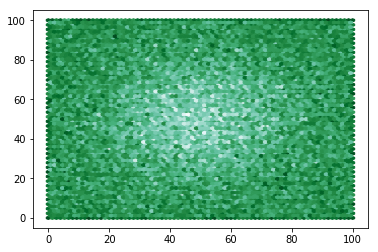

In [11]:
nbins = 75
plt.hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)

/home/kristor/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


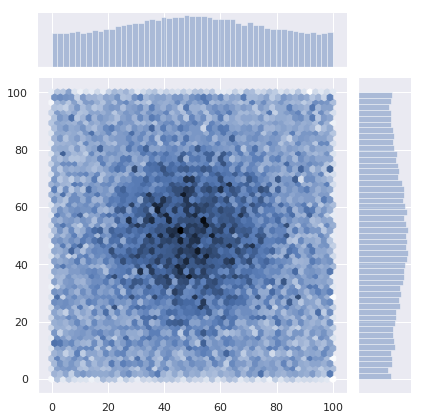

In [12]:
sns.set(style="darkgrid")
sns.jointplot(x=x, y=y, kind='hex')

/home/kristor/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


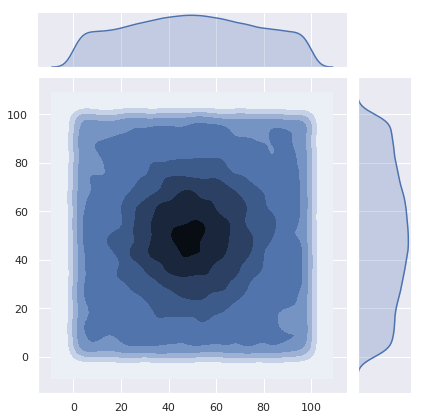

In [13]:
sns.set(style="darkgrid")
sns.jointplot(x=x, y=y, kind='kde')

/home/kristor/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


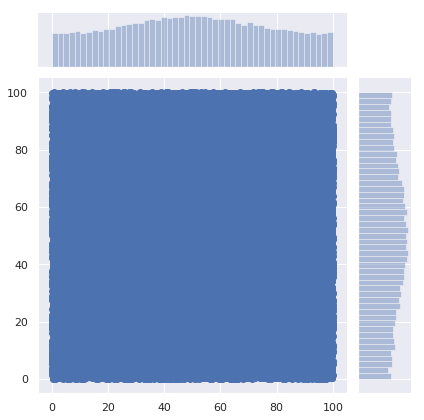

In [14]:
sns.set(style="darkgrid")
sns.jointplot(x=x, y=y, kind='scatter')